IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME11: projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

GAYET Tiphaine

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**Ce TD-TME11 est prévu pour être fait lors de la dernière séance de TD-TME11 de votre groupe.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-11-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2024


## Date de remise 

Le travail doit être rendu (sur le site Moodle) avant le <font size="+1" color="RED"><b>vendredi 17 mai 2024, à 18h</b></font>
    

<b>Il n'y aura pas d'extension de la date de remise autorisée : <font size="+1" color="RED">aucun rendu ne sera accepté après 18h.</font></b>

<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

## Travail à faire

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

Appliquer les algorithmes d'apprentissage non supervisés vus en cours (CAH et k-moyennes) sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- *Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 21 mai 2024**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- tme-11/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [3]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time
import random

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.

S'il n'est pas possible d'installer cette librairie, les données sont accessibles sur la page web citée ci-dessus (cliquer sur "Download" en haut et à droite de la page).

### Chargement des données

In [4]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

In [5]:
np.unique(y.Class)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Apprentissage non-supervisé

Pour ce sujet, vous considèrerez seulement les données de description (features X) sur lesquelles vous proposerez des expérimentations des algorithmes d'apprentissage non-supervisé vus en cours mettant en évidence des clusters et leur évaluation.

Ainsi, vous devrez:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).


   


### Le poster

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données *Pen-Based Recognition of Handwritten Digits*, les résultats obtenus lors de l'apprentissage supervisé (études et résultats de votre TME-10) et lors de l'apprentissage non-supervisé (études et résultats de votre TME-11) ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.


## Normalisation des données

In [61]:
# Initialisation du df sample
X_sample = pd.DataFrame([],columns=X.columns)
y_sample = pd.DataFrame([],columns=y.columns)

# Parcours de chaque classe
classes = np.unique(y.Class)

for classe in classes:
    # Indices des exemples de la classe courante
    indices_classe = np.array(y.loc[y['Class'] == classe].index)
    
    # Sélection de la moitié des indices pour la base d'apprentissage et l'autre moitié pour la base de test
    random.shuffle(indices_classe)
    split_index = len(indices_classe) // 100 #1% des données
    indices_sample = indices_classe[:split_index]
 
    # Ajout aux bases de test et d'apprentissage
    X_sample = pd.concat([X_sample, X.iloc[indices_sample]])
    y_sample = pd.concat([y_sample, y.iloc[indices_sample]])
    
print(X_sample, y_sample)

      Attribute1 Attribute2 Attribute3 Attribute4 Attribute5 Attribute6  \
2426          53         91         19         73          0         30   
5059          15         85          0         40         18          0   
2756          17         36         37          4         72          0   
5114          44         79         19         60          6         14   
4164          41        100          5         70          0         21   
...          ...        ...        ...        ...        ...        ...   
2725          64         99         24         99         62         80   
4038          53        100          7         98         21         69   
9219          80         98        100         92         64        100   
6896          38         94          0         77         73         53   
10485         84         94         39        100         28         61   

      Attribute7 Attribute8 Attribute9 Attribute10 Attribute11 Attribute12  \
2426          23     

In [62]:
desc = X_sample.reset_index(drop=True)
label = y_sample.reset_index(drop=True)

In [63]:
normalized_sample = clust.normalisation(desc)

## 1 - Exécution du clustering hiérarchique ascendant

CHA_centroid: clustering hiérarchique ascendant, version Centroid Linkage
Distance mininimale trouvée entre  [6, 7] : 0.20951944822408786
CHA_centroid: une fusion réalisée de 6 avec 7 de distance 0.2095
CHA_centroid: le nouveau cluster contient 2 exemples
Distance mininimale trouvée entre  [4, 5] : 0.21389913868029387
CHA_centroid: une fusion réalisée de 4 avec 5 de distance 0.2139
CHA_centroid: le nouveau cluster contient 2 exemples
Distance mininimale trouvée entre  [65, 68] : 0.22427661492005804
CHA_centroid: une fusion réalisée de 65 avec 68 de distance 0.2243
CHA_centroid: le nouveau cluster contient 2 exemples
Distance mininimale trouvée entre  [22, 32] : 0.2618404388859064
CHA_centroid: une fusion réalisée de 22 avec 32 de distance 0.2618
CHA_centroid: le nouveau cluster contient 2 exemples
Distance mininimale trouvée entre  [37, 40] : 0.2728190768629974
CHA_centroid: une fusion réalisée de 37 avec 40 de distance 0.2728
CHA_centroid: le nouveau cluster contient 2 exemples
Distan

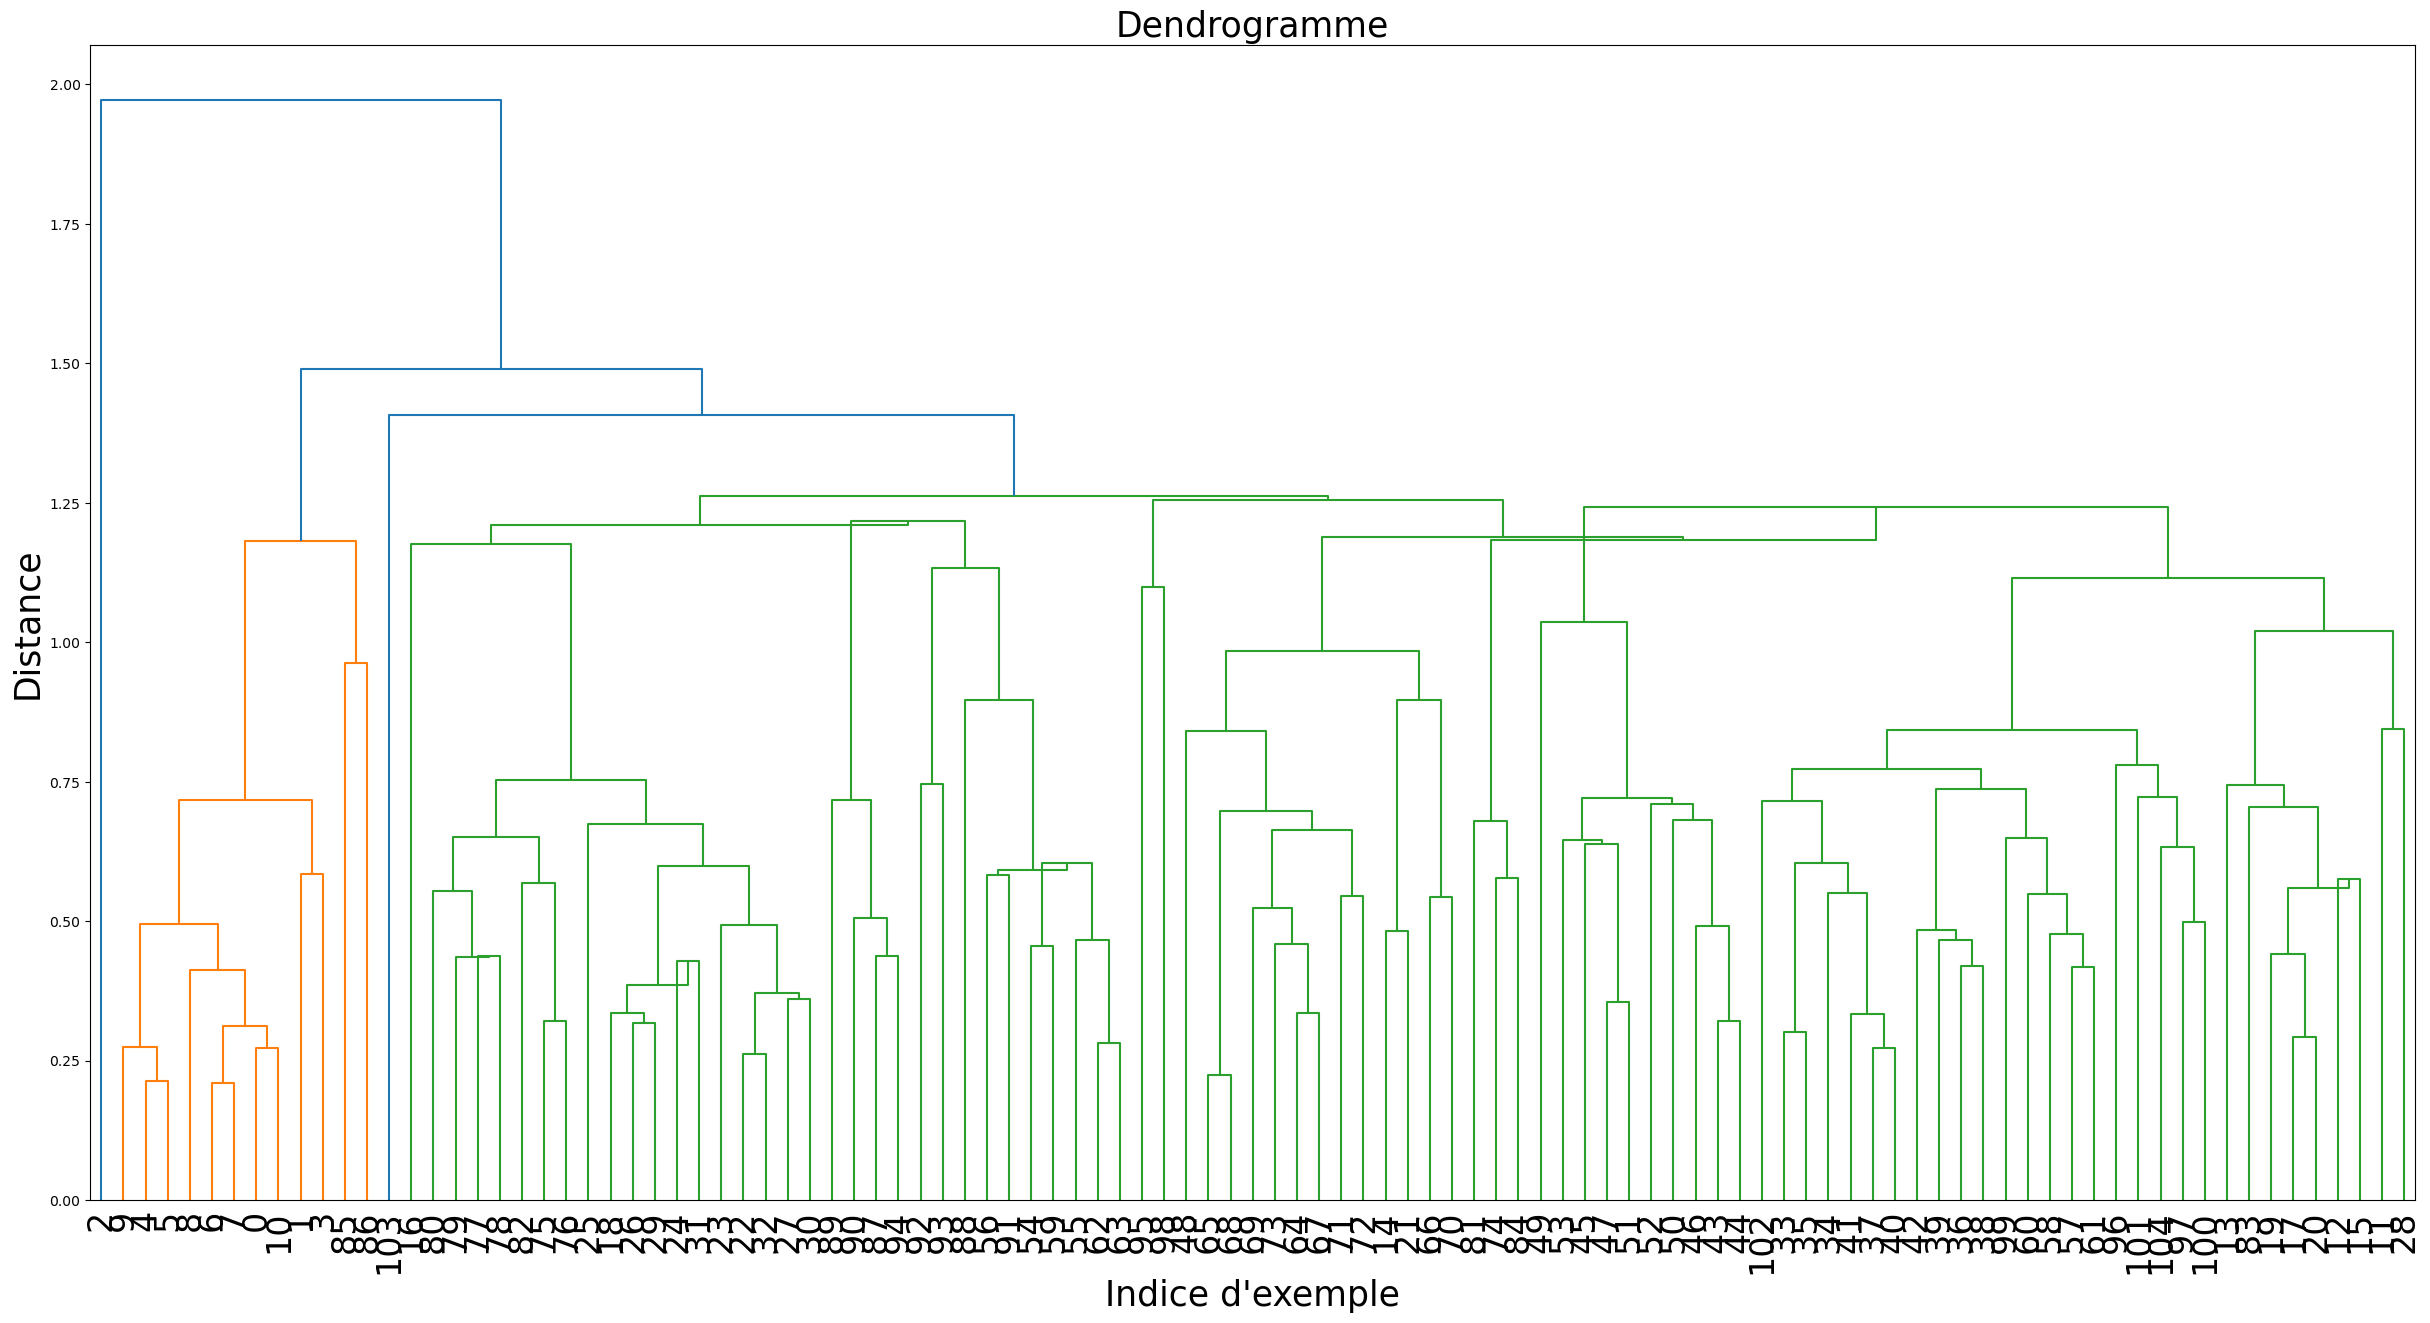

In [64]:
res = clust.CHA_centroid(normalized_sample, verbose=True, dendrogramme=True)

## 2 - K-means

In [72]:
inerties = []
nb_means = []

for k in range(1,21):
    centres, affectation, final_inertie = clust.kmoyennes(k, X_sample, 0.05, 100)
    inerties.append(final_inertie)
    nb_means.append(k)

iteration 1 Inertie : 1558001.2952 Difference: 0.0000
iteration 1 Inertie : 1232599.2333 Difference: 88985.6494
iteration 2 Inertie : 1213218.6000 Difference: 19380.6333
iteration 3 Inertie : 1212261.9879 Difference: 956.6121
iteration 4 Inertie : 1212261.9879 Difference: 0.0000
iteration 1 Inertie : 999329.3016 Difference: 16771.3331
iteration 2 Inertie : 988339.8998 Difference: 10989.4018
iteration 3 Inertie : 981971.9050 Difference: 6367.9948
iteration 4 Inertie : 979873.5492 Difference: 2098.3558
iteration 5 Inertie : 979873.5492 Difference: 0.0000
iteration 1 Inertie : 890535.4937 Difference: 100445.3734
iteration 2 Inertie : 862541.6146 Difference: 27993.8791
iteration 3 Inertie : 845089.1304 Difference: 17452.4843
iteration 4 Inertie : 835990.9065 Difference: 9098.2239
iteration 5 Inertie : 835990.9065 Difference: 0.0000
iteration 1 Inertie : 805602.3009 Difference: 43039.5505
iteration 2 Inertie : 788054.5898 Difference: 17547.7111
iteration 3 Inertie : 784800.0295 Difference: 

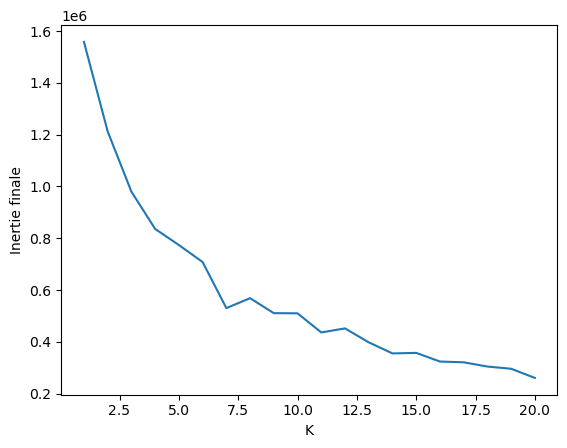

In [73]:
plt.plot(nb_means, inerties)
plt.ylabel('Inertie finale')
plt.xlabel("K")
plt.show()

### Avec un sample de données en 2D

In [76]:
# On selectionne deux attributs

X_2D = X[['Attribute8', 'Attribute12']]
normalized_2D = clust.normalisation(X_2D)

normalized_2D

,Attribute8,Attribute12
0,0.00,0.53
1,0.45,0.00
2,1.00,0.51
3,0.45,0.45
4,0.80,0.40
...,...,...
10987,0.33,0.55
10988,0.27,0.09
10989,0.00,0.51
10990,0.00,0.66


In [78]:
les_centres, l_affectation, inertie_finale = clust.kmoyennes(10, normalized_2D, 0.05, 100)

iteration 1 Inertie : 168.2876 Difference: 29.9567
iteration 2 Inertie : 159.8482 Difference: 8.4394
iteration 3 Inertie : 153.7536 Difference: 6.0946
iteration 4 Inertie : 148.5553 Difference: 5.1984
iteration 5 Inertie : 144.9688 Difference: 3.5865
iteration 6 Inertie : 142.2614 Difference: 2.7073
iteration 7 Inertie : 140.3713 Difference: 1.8902
iteration 8 Inertie : 139.1704 Difference: 1.2008
iteration 9 Inertie : 138.1958 Difference: 0.9747
iteration 10 Inertie : 137.4638 Difference: 0.7320
iteration 11 Inertie : 136.9687 Difference: 0.4951
iteration 12 Inertie : 136.6167 Difference: 0.3520
iteration 13 Inertie : 136.4807 Difference: 0.1360
iteration 14 Inertie : 136.3846 Difference: 0.0961
iteration 15 Inertie : 136.3190 Difference: 0.0656
iteration 16 Inertie : 136.3008 Difference: 0.0182


In [79]:
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Affichage des centres:  [[0.9543083  0.51808696]
 [0.06414634 0.87370158]
 [0.36990333 0.2310956 ]
 [0.7429716  0.27627094]
 [0.57971729 0.07195676]
 [0.15731995 0.2822196 ]
 [0.49163743 0.82590643]
 [0.40093787 0.55297773]
 [0.3604005  0.04391114]
 [0.00765991 0.60541342]]
Affichage des affectations:  {0: [2, 21, 27, 38, 49, 66, 73, 89, 94, 96, 97, 114, 126, 128, 131, 137, 143, 146, 150, 151, 154, 155, 161, 167, 174, 176, 177, 180, 186, 188, 192, 207, 208, 215, 233, 238, 245, 248, 249, 256, 259, 266, 267, 305, 313, 320, 325, 351, 363, 385, 388, 401, 403, 414, 415, 424, 437, 453, 454, 461, 462, 463, 472, 473, 488, 495, 501, 519, 549, 562, 590, 594, 601, 610, 613, 615, 631, 650, 651, 655, 665, 671, 673, 689, 694, 695, 698, 719, 739, 765, 767, 775, 792, 793, 802, 806, 818, 824, 856, 869, 874, 875, 878, 882, 883, 891, 903, 918, 927, 943, 945, 955, 963, 980, 983, 991, 1016, 1022, 1033, 1057, 1058, 1060, 1064, 1067, 1077, 1088, 1099, 1106, 1109, 1111, 1113, 1131, 1137, 1138, 1142, 1143, 114

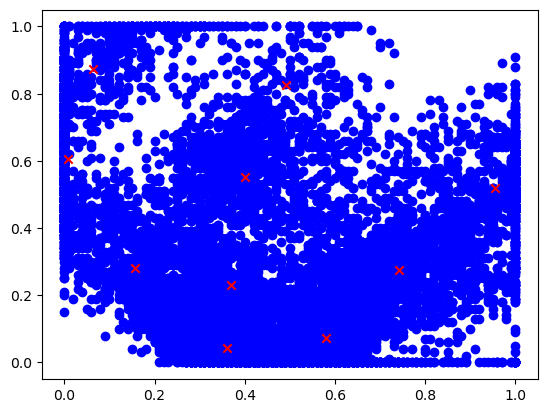

In [81]:
#affichages des centroides trouvés
plt.scatter(normalized_2D['Attribute8'],normalized_2D['Attribute12'],color='b')
plt.scatter(les_centres[:,0],les_centres[:,1],color='r',marker='x')

In [85]:
normalized_2D.columns

Index(['Attribute8', 'Attribute12'], dtype='object')

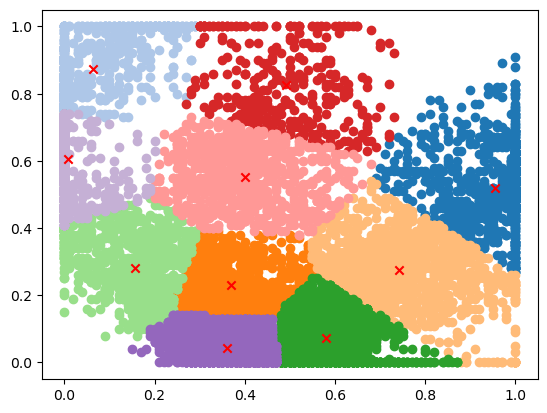

In [87]:
## Affichage des clusters

# Couleurs pour le graphique
couleurs = cm.tab20(np.linspace(0, 1, 20))


# Affichage des points par cluster
for i in l_affectation.keys():
    plt.scatter(normalized_2D.iloc[l_affectation[i]]['Attribute8'], 
                normalized_2D.iloc[l_affectation[i]]['Attribute12'], 
                color=couleurs[i])
# Affichage des centres
plt.scatter(les_centres[:, 0], les_centres[:, 1], color='r', marker='x')

plt.show()

In [94]:
classes = np.unique(y.Class)

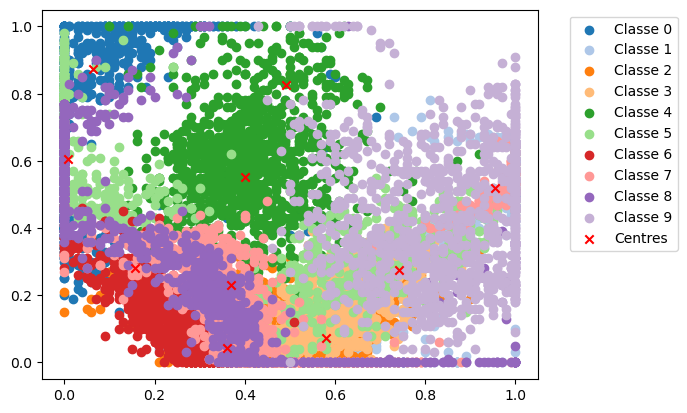

In [100]:
## Affichage des classes

# Couleurs pour les classes
couleurs = cm.tab20(np.linspace(0, 1, 20))

for classe in classes :
    # Indices des exemples de la classe courante
    indices_classe = np.array(y.loc[y['Class'] == classe].index)
    plt.scatter(normalized_2D.iloc[indices_classe]['Attribute8'], normalized_2D.iloc[indices_classe]['Attribute12'], 
                color=couleurs[classe], label=f'Classe {classe}')

# Affichage des centres
plt.scatter(les_centres[:, 0], les_centres[:, 1], color='r', marker='x', label='Centres')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<div class="alert alert-block alert-info">
    Ici, nous avons pu représenté graphiquement l'algorithme des K-means.
    Si on compare les deux graphiques, on remarque immédiatement que les classes ne sont pas aussi bien séparées que les clusters.
    On peut en déduire que les attributs 8 et 12 ne sont pas très discriminants lorsque confrontés l'un à l'autre.
</div>

### Evaluations avec index sur normalized_sample

In [104]:
centres, affectation, inertie = clust.kmoyennes(10, normalized_sample, 0.05, 100)

iteration 1 Inertie : 53.9290 Difference: 4.6851
iteration 2 Inertie : 51.1324 Difference: 2.7966
iteration 3 Inertie : 51.1324 Difference: 0.0000


In [114]:
# Calcul de la codistance de la partition
codistance_value = clust.codistance_partition(affectation, normalized_sample)
print("Codistance de la partition:", codistance_value)

Codistance de la partition: 15.533552672579713


In [116]:
# Calcul de la coinertie de la partition
coinertie_value = clust.coinertie_partition(affectation, centres, normalized_sample)
print("Coinertie de la partition:", coinertie_value)

Coinertie de la partition: 51.132444667239994


In [117]:
# Calcul de la séparabilité de la partition
separabilite_value = clust.semin_partition(centres)
print("Séparabilité de la partition (SEMIN):", separabilite_value)

Séparabilité de la partition (SEMIN): 0.915352790078937


In [118]:
# Calcul de l'index de DUNN
print("Index de DUNN: ", clust.DUNN(affectation, centres, normalized_sample))

Index de DUNN:  16.970017288350814


In [119]:
# Calcul de l'index de XIE-BENI
print("Index de XIE-BENI: ", clust.XIEBENI(affectation, centres, normalized_sample))

Index de XIE-BENI:  55.860915290191556


Essayons maintenant sur notre dataset normalized_2D

In [122]:
DUNN_2D = clust.DUNN(l_affectation, les_centres, normalized_2D)
print("Index de DUNN: ", DUNN_2D)

Index de DUNN:  24.159181774274963


In [121]:
XIE_2D = clust.XIEBENI(l_affectation, les_centres, normalized_2D)
print("Index de XIE-BENI: ", XIE_2D)

Index de XIE-BENI:  727.268241065547


L'index de XIE-BENI est élévé car la coinertie est somme de distances au carré. D'où la différence entre les deux samples, de différentes tailles.

In [129]:
normalized_2D.shape

(10992, 2)

In [130]:
normalized_sample.shape

(105, 16)

On peut tout de même en déduire que la séparabilité n'est pas optimale dans ces deux cas.

En ce qui concerne l'homogénéité, l'index de DUNN est déjà plus faible, on peut en déduire qu'elle est relativement bonne. Cependant nous n'avons pas assez de mesures différentes pour en tirer de vraies conclusions.

### Études des classes 0 et 1 sur les attributs 1 et 6

In [23]:
# On selectionne deux attributs et deux classes
classes = [0, 1]
attributes = ['Attribute1', 'Attribute6']
X12 = X[attributes]

XX = pd.DataFrame([],columns=X12.columns)      
yy = pd.DataFrame([],columns=y.columns)

for c in classes :
    indices_classe = np.array(y.loc[y['Class'] == c].index)
    XX = pd.concat([XX, X12.iloc[indices_classe]])
    yy = pd.concat([yy, y.iloc[indices_classe]])
    
normalized_XX = clust.normalisation(XX)
normalized_X12 = clust.normalisation(X12)

In [24]:
centres, affect, inertie = clust.kmoyennes(2, normalized_XX, 0.05, 100)

iteration 1 Inertie : 206.0774 Difference: 176.5043
iteration 2 Inertie : 199.0331 Difference: 7.0443
iteration 3 Inertie : 198.7523 Difference: 0.2808
iteration 4 Inertie : 198.7278 Difference: 0.0245


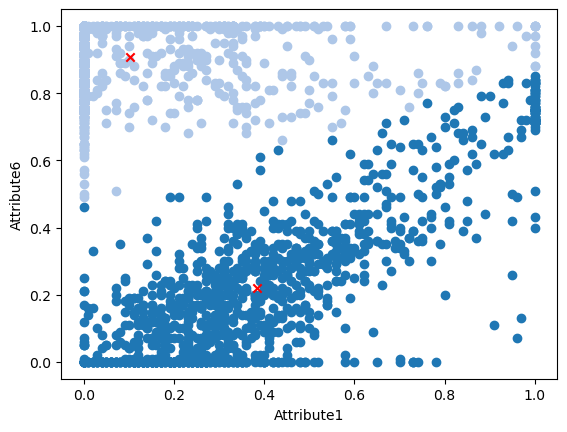

In [29]:
## Affichage des clusters

# Couleurs pour le graphique
couleurs = cm.tab20(np.linspace(0, 1, 20))


# Affichage des points par cluster
for i in affect.keys():
    plt.scatter(normalized_XX.iloc[affect[i]][attributes[0]], 
                normalized_XX.iloc[affect[i]][attributes[1]], 
                color=couleurs[i])
# Affichage des centres
plt.scatter(centres[:, 0], centres[:, 1], color='r', marker='x')
plt.xlabel(attributes[0])
plt.ylabel(attributes[1])
plt.show()

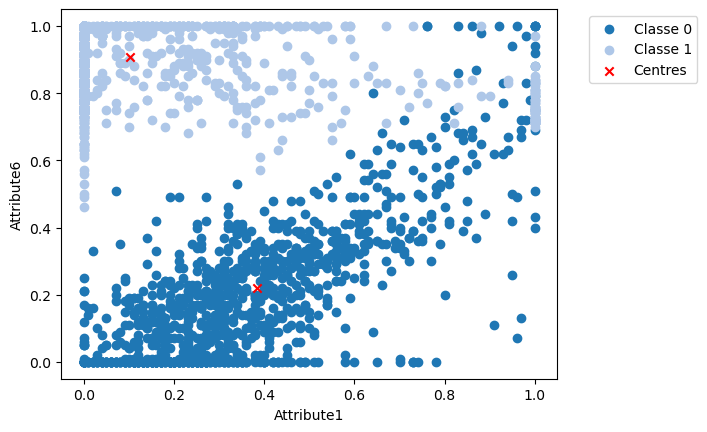

In [30]:
## Affichage des classes

# Couleurs pour les classes
couleurs = cm.tab20(np.linspace(0, 1, 20))

for classe in classes :
    # Indices des exemples de la classe courante
    indices_classe = np.array(y.loc[y['Class'] == classe].index)
    plt.scatter(normalized_X12.iloc[indices_classe][attributes[0]], normalized_X12.iloc[indices_classe][attributes[1]], 
                color=couleurs[classe], label=f'Classe {classe}')

# Affichage des centres
plt.scatter(centres[:, 0], centres[:, 1], color='r', marker='x', label='Centres')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(attributes[0])
plt.ylabel(attributes[1])
plt.show()

<div class="alert alert-block alert-info">
Ici les clusters trouvés correspondent bien mieux aux classes étudiée. On en conclut que les attributs 1 et 6 sont discriminants pour les classes 0 et 1.
</div>

#### Evaluations

In [40]:
# Calcul de la coinertie de la partition
coinertie_value = clust.coinertie_partition(affect, centres, normalized_X12)
print("Coinertie de la partition:", coinertie_value)

Coinertie de la partition: 804.4549737634597


In [41]:
# Calcul de la séparabilité de la partition
separabilite_value = clust.semin_partition(centres)
print("Séparabilité de la partition (SEMIN):", separabilite_value)

Séparabilité de la partition (SEMIN): 0.7431166375243649


In [42]:
# Calcul de l'index de XIE-BENI
print("Index de XIE-BENI: ", clust.XIEBENI(affect, centres, normalized_X12))


Index de XIE-BENI:  1082.5420036933083


In [43]:
# Calcul de la codistance de la partition
#codistance_value = clust.codistance_partition(affect, normalized_X12)
#print("Codistance de la partition:", codistance_value)

In [44]:
#DUNN_12 = clust.DUNN(affect, centres, normalized_X12)
#print("Index de DUNN: ", DUNN_12)
